#                                                       MINI PROJECT-2 ( OCR using Support Vector Machine )
**Group Members:**

-*Anmol Khandelwal*

-*Aryan Mangla*

-*Devashish Singh*

---



---





In [2]:
# Import the required Libraries
import pandas as pd                            #allows importing data from various file formats like CSV, JSON, SQL
import numpy as np                             #used for working with arrays
from sklearn.svm import SVC                    #Sklearn features various classification, regression & clustering algorithms including SVM     
                                               #SVC (Support Vector Classifier)

import matplotlib.pyplot as plt                #plotting library
import seaborn as sns                          #Seaborn contains a few plots and patterns for data visualisation, while
                                               #in matplotlib,datasets are visualised with the assistance of lines, 
                                               #scatter plots, pie charts, histograms, bar-graphs, etc

from sklearn.model_selection import train_test_split  #for splitting data arrays into two subsets:-
                                                      #for training data and for testing data

from sklearn.metrics import confusion_matrix   #Compute confusion matrix to evaluate the accuracy of a classification
from sklearn import metrics                    #In multilabel classification, this function computes subset accuracy

from sklearn.preprocessing import MinMaxScaler #Transform features by scaling each feature to a given range.B/W 0 & 1 by default 
                                               #preserves the shape of the original distribution

In [3]:
#Read dataset "letter-recognition.csv"
letters = pd.read_csv('letter-recognition.csv')

"""
1. letter capital letter (26 values from A to Z)
2. xbox horizontal position of box (integer)
3. ybox vertical position of box (integer)
4. width width of box (integer)
5. hight height of box (integer)
6. onpix total # on pixels (integer)
7. xbar mean x of on pixels in box (integer)
8. ybar mean y of on pixels in box (integer)
9. x2bar mean x variance (integer)
10. y2bar mean y variance (integer)
11. xybar mean x y correlation (integer)
12. x2ybar mean of x * x * y (integer)
13. xy2bar mean of x * y * y (integer)
14. xedge mean edge count left to right (integer)
15. xedgey correlation of xedge with y (integer)
16. yedge mean edge count bottom to top (integer)
17. yedgex correlation of yedge with x (integer)
"""

'\n1. letter capital letter (26 values from A to Z)\n2. xbox horizontal position of box (integer)\n3. ybox vertical position of box (integer)\n4. width width of box (integer)\n5. hight height of box (integer)\n6. onpix total # on pixels (integer)\n7. xbar mean x of on pixels in box (integer)\n8. ybar mean y of on pixels in box (integer)\n9. x2bar mean x variance (integer)\n10. y2bar mean y variance (integer)\n11. xybar mean x y correlation (integer)\n12. x2ybar mean of x * x * y (integer)\n13. xy2bar mean of x * y * y (integer)\n14. xedge mean edge count left to right (integer)\n15. xedgey correlation of xedge with y (integer)\n16. yedge mean edge count bottom to top (integer)\n17. yedgex correlation of yedge with x (integer)\n'

In [4]:
#first 5 row from data
letters.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [5]:
#last 5 row from data
letters.tail()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8
19999,A,4,9,6,6,2,9,5,3,1,8,1,8,2,7,2,8


In [6]:
#about the dataset

#dimensions
print("Dimensions:-","\n\n","(Rows,Columns)","\n", letters.shape, "\n\n\n")

#data types
print(letters.info())


Dimensions:- 

 (Rows,Columns) 
 (20000, 17) 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB
None


In [7]:
#extract latters from data and sorted
Order =list(np.sort(letters['letter'].unique()))
print(Order)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [8]:
# a quirky bug: the column names have a space, e.g. 'xbox ', which throws and error when indexed
print(letters.columns)

Index(['letter', 'xbox ', 'ybox ', 'width ', 'height', 'onpix ', 'xbar ',
       'ybar ', 'x2bar', 'y2bar ', 'xybar ', 'x2ybar', 'xy2bar', 'xedge ',
       'xedgey', 'yedge ', 'yedgex'],
      dtype='object')


In [9]:
# let's 'reindex' the column names
letters.columns = ['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar',
       'ybar', 'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge',
       'xedgey', 'yedge', 'yedgex']
print(letters.columns)

Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge', 'yedgex'],
      dtype='object')


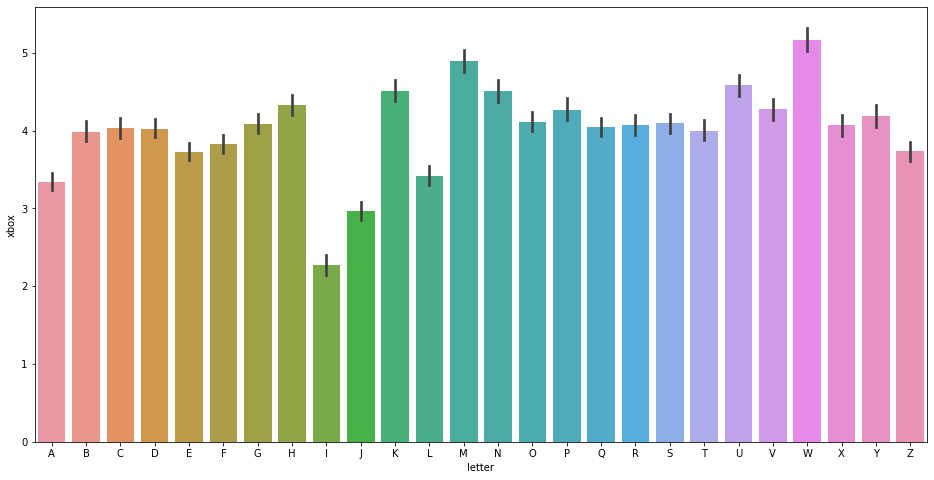

In [10]:
# basic plots: How do various attributes vary with the letters

plt.figure(figsize=(16, 8))
sns.barplot(x='letter', y='xbox', 
            data=letters, 
            order=Order)

In [11]:
letter_means = letters.groupby('letter').mean()
letter_means.head()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
letter,,,,,,,,,,,,,,,,
A,3.337136,6.975919,5.128010,5.178707,2.991128,8.851711,3.631179,2.755387,2.043093,7.802281,2.338403,8.465146,2.771863,6.321926,2.875792,7.468948
B,3.985640,6.962141,5.088773,5.169713,4.596606,7.671018,7.062663,5.366841,5.571802,7.954308,5.506527,6.652742,3.117493,7.919060,6.612272,9.100522
C,4.031250,7.063859,4.701087,5.296196,2.775815,5.437500,7.627717,5.927989,7.177989,8.773098,7.494565,11.947011,1.991848,8.876359,4.080163,8.555707
D,4.023602,7.244720,5.170186,5.288199,4.026087,7.539130,6.806211,5.921739,6.508075,8.166460,5.111801,5.750311,3.365217,7.813665,3.971429,7.628571
E,3.727865,6.944010,4.756510,5.201823,3.679688,5.966146,7.352865,4.223958,7.585938,8.507812,6.242188,10.341146,2.127604,8.298177,6.022135,8.506510


In [12]:
# average feature values
round(letters.drop('letter', axis=1).mean(), 2)

xbox      4.02
ybox      7.04
width     5.12
height    5.37
onpix     3.51
xbar      6.90
ybar      7.50
x2bar     4.63
y2bar     5.18
xybar     8.28
x2ybar    6.45
xy2bar    7.93
xedge     3.05
xedgey    8.34
yedge     3.69
yedgex    7.80
dtype: float64

In [13]:

# splitting into X and y
X = letters.drop("letter", axis = 1)
y = letters['letter']

In [14]:
# scaling the features
#Create Object from MinMaxScaler
s = MinMaxScaler()
#fit_transform for dataset
X_scaled = s.fit_transform(X)

In [15]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 101)

In [16]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred_linear = model_linear.predict(X_test)
print ('y_prediction' , y_pred_linear) 

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_linear), "\n")
# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_linear))

y_prediction ['F' 'E' 'M' ... 'F' 'B' 'C']
accuracy: 0.8201666666666667 

[[193   0   0   2   0   0   0   0   0   0   1   1   0   1   0   0   1   2
    1   1   1   0   1   0   4   0]
 [  0 189   0   7   0   0   4   5   0   0   0   0   0   0   0   0   2   8
    2   0   0   0   0   1   0   0]
 [  0   0 179   0  12   2  11   0   0   0  13   0   1   0   7   0   0   0
    2   0   3   0   0   0   0   0]
 [  2  21   0 209   0   0   1   2   0   0   0   0   1   3   0   0   1   5
    0   1   1   0   0   0   0   1]
 [  0   2   0   0 206   1   8   0   0   0   2   1   0   0   0   0   3   3
    2   3   0   0   0   1   0   2]
 [  0   5   0   2   0 188   2   3   1   0   0   0   0   2   0   0   0   0
    5  10   1   1   2   0   2   1]
 [  1   1   7   8   0   2 157   2   0   0   5   2   2   0   1   1  15   3
    9   0   0   0   3   0   0   0]
 [  0  10   0  13   1   1   4 134   0   0   4   1   2   0  18   0   6  14
    0   0   3   2   0   2   2   0]
 [  0   3   2   6   0   7   0   0 175   4   0   0   0 

In [17]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred_rbf = non_linear_model.predict(X_test)
print('y_prediction is :' ,y_pred_rbf )

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_rbf), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_rbf))

y_prediction is : ['P' 'E' 'M' ... 'F' 'B' 'C']
accuracy: 0.9195 

[[202   0   0   0   0   0   1   0   0   0   0   1   0   0   0   0   0   1
    0   0   1   0   0   0   3   0]
 [  0 201   0   6   0   0   1   0   0   0   0   0   0   0   0   0   0   8
    1   0   0   0   0   1   0   0]
 [  0   0 206   0   8   0   8   1   0   0   1   0   0   0   6   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   9   0 231   0   0   0   1   0   0   0   0   1   3   1   0   1   1
    0   0   0   0   0   0   0   0]
 [  0   1   1   0 215   2   8   0   0   0   0   2   0   0   0   0   1   2
    0   0   0   0   0   0   0   2]
 [  0   0   0   2   0 211   1   2   1   1   0   0   0   1   0   0   0   0
    2   3   0   0   1   0   0   0]
 [  0   1   3   4   1   2 197   0   0   0   1   0   2   0   2   0   2   1
    0   0   0   1   2   0   0   0]
 [  0   8   1   9   0   1   4 162   0   0   3   1   1   0   4   0   5  14
    0   0   3   0   0   0   1   0]
 [  0   0   1   2   0   4   0   0 192   8   0   0   0   0   0

In [18]:

# using sigmoid kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='sigmoid')
# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred_sigmoid = non_linear_model.predict(X_test)
print('y_prediction is ::' , y_pred_sigmoid)

# accuracy
print("accuracy :", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_sigmoid), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_sigmoid))

y_prediction is :: ['A' 'A' 'A' ... 'A' 'A' 'A']
accuracy : 0.027 

[[100   0   7   0   0   0  18   0   0   0   0   0   0   0   0   0   0   0
    0   0  84   0   0   0   0   0]
 [158   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  60   0   0   0   0   0]
 [212   0   0   0   0   0   0   0   0   0   0   2   0   0   0   0   0   0
    0   0  16   0   0   0   0   0]
 [128   0   0   0   0   0   0   0   0   0   0  25   0   0   0   0   0   0
    0   0  95   0   0   0   0   0]
 [198   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  36   0   0   0   0   0]
 [117   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 108   0   0   0   0   0]
 [175   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0
    0   0  43   0   0   0   0   0]
 [155   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  62   0   0   0   0   0]
 [ 90   0   0   0   0   0   0   0   0   0   0   0   0   0   

In [19]:
# using poly kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='poly')
# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred_poly = non_linear_model.predict(X_test)
print('y_prediction is ::' , y_pred_poly)

# accuracy
print("accuracy :", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_poly), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_poly))

y_prediction is :: ['P' 'E' 'M' ... 'F' 'D' 'C']
accuracy : 0.9446666666666667 

[[206   1   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0
    0   0   0   0   0   0   1   0]
 [  0 207   0   2   1   0   0   0   0   0   0   0   0   1   0   0   0   4
    2   0   0   0   0   1   0   0]
 [  0   0 218   0   2   0   5   1   0   0   0   0   0   0   4   0   0   0
    0   0   0   0   0   0   0   0]
 [  1   3   0 233   0   1   1   1   0   0   0   0   0   3   2   0   1   2
    0   0   0   0   0   0   0   0]
 [  0   0   3   0 217   2   7   0   0   0   0   1   0   0   0   0   0   0
    1   0   0   0   0   1   0   2]
 [  0   0   0   3   0 214   0   1   1   0   0   0   0   1   0   2   0   0
    1   2   0   0   0   0   0   0]
 [  0   1   3   2   1   1 206   0   0   0   0   0   1   0   1   0   0   0
    0   0   0   1   2   0   0   0]
 [  0   3   2   6   1   1   1 185   0   0   0   1   1   0   2   0   4   9
    0   0   0   0   0   0   1   0]
 [  0   0   1   2   0   2   0   0 199   9   0  

In [20]:
print("accuracy with linear kernel :", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_linear)*100,"\n")
print("accuracy with rbf kernel :",    metrics.accuracy_score(y_true=y_test, y_pred=y_pred_rbf)*100, "\n")
print("accuracy with sigmoid kernel :", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_sigmoid)*100, "\n")
print("accuracy with poly kernel :",   metrics.accuracy_score(y_true=y_test, y_pred=y_pred_poly)*100, "\n")

accuracy with linear kernel : 82.01666666666667 

accuracy with rbf kernel : 91.95 

accuracy with sigmoid kernel : 2.7 

accuracy with poly kernel : 94.46666666666667 




#From this comparison Poly-Kernel has highest accuracy of 94.46%

Thanks! 


